In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ppr.path import TolerancedNumber, TrajectoryPt

In [3]:
# create tolerances for x-position and orientation
dx    = TolerancedNumber(1, 0.9, 1.1, samples=3)
angle = TolerancedNumber(0.0, -0.5, 0.5, samples=5)

# create a list with path points
path1 = []
n_path = 6
for i in range(n_path):
   yi = 0.3 + i * 0.6 / n_path
   path1.append(TrajectoryPt([dx, yi, angle]))

In [4]:
from ppr.robot import Robot_2P3R

In [5]:
robot1 = Robot_2P3R([1, 1, 0.5, 0.5, 0.3])

In [6]:
from ppr.geometry import Rectangle

In [7]:
sc1 = [Rectangle(0.0, 0.4, 0.1, 0.2, -0.3),
       Rectangle(0.2, 0.8, 0.1, 0.5, 0.2)]

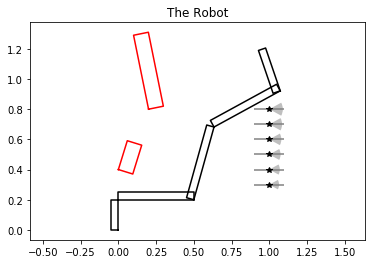

In [30]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [0.2, 0.5, 1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'r')
plt.show()

# Sampling based path following

In [9]:
from ppr.path import cart_to_joint

The following function can be quit slow. I have c++ code for collision checking between rectangles to improve performance by a factor 5 or so. Should at this to the master branch.

In [56]:
# set joint limits for the first two joints (the other ones are not used yet...)
robot1.set_joint_limits([[-2, 0], [-1, 0.5]])
# change the number of ik samples
robot1.ik_samples = [20, 4]
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

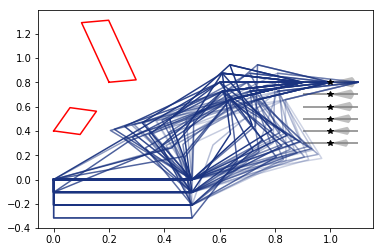

In [57]:
fig2, ax2 = plt.subplots()
robot1.plot_path_kinematics(ax2, path_js[5])
for tp in path1: tp.plot(ax2)
for r in sc1: r.plot(ax2, 'r')
plt.show()

In [58]:
from ppr.path import get_shortest_path

In [59]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[319 263 209 158 110  68]
True


In [60]:
# show the number of sampled joint positions for every trajectory point
[qp.shape[0] for qp in path_js]

[320, 264, 210, 159, 111, 69]

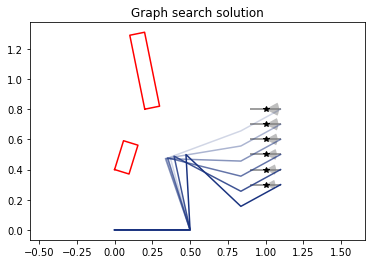

In [61]:
fig3, ax3 = plt.subplots()
plt.title("Graph search solution")
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, sol['path'])
for tp in path1: tp.plot(ax3)
for r in sc1: r.plot(ax3, 'r')
plt.show()

# Optimisation based path following

In [62]:
from ppr.optim import get_optimal_trajectory

In [63]:
robot1.set_link_inertia([1, 1, 1, 0.5, 0.5],
                        [0.5, 0.5, 0.25, 0.25, 0.15],
                        [0.05, 0.05, 0.05, 0.05, 0.05])
q_init = sol['path']

In [64]:
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000074995074952
            Iterations: 99
            Function evaluations: 3440
            Gradient evaluations: 99


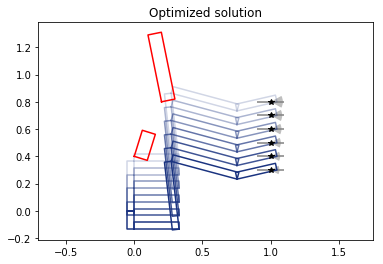

In [65]:
fig4, ax4 = plt.subplots()
plt.title("Optimized solution")
ax4.axis('equal')
robot1.plot_path(ax4, q_opt)
for tp in path1: tp.plot(ax4)
for r in sc1: r.plot(ax4, 'r')
plt.show()

## Use collision constraints

In [66]:
q_opt2, dq_opt2, ddq_opt2 = get_optimal_trajectory(robot1, path1, q_init,
                                               check_collision=True, scene=sc1)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.5015699588223124
            Iterations: 101
            Function evaluations: 3421
            Gradient evaluations: 101


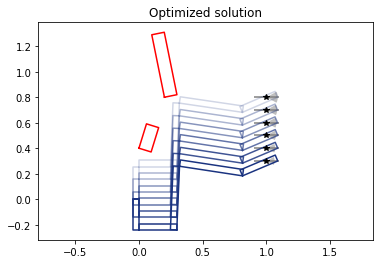

In [67]:
fig5, ax5 = plt.subplots()
plt.title("Optimized solution")
ax5.axis('equal')
robot1.plot_path(ax5, q_opt2)
for tp in path1: tp.plot(ax5)
for r in sc1: r.plot(ax5, 'r')
plt.show()

In [69]:
weights = w={'joint_motion': 0.0, 'path_error': 0.0, 'torque': 1.0}
robot1.set_link_inertia([1, 1, 1, 1, 1], [0.5, 0.5, 0.25, 0.25, 0.25], [0.05, 0.05, 0.05, 0.05, 0.05])
q_opt2, dq_opt2, ddq_opt2 = get_optimal_trajectory(robot1, path1, q_init,
                                               check_collision=True, scene=sc1,
                                                  w = weights)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.006702214347199753
            Iterations: 58
            Function evaluations: 1931
            Gradient evaluations: 58


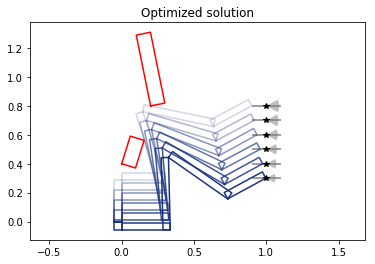

In [70]:
fig5, ax5 = plt.subplots()
plt.title("Optimized solution")
ax5.axis('equal')
robot1.plot_path(ax5, q_opt2)
for tp in path1: tp.plot(ax5)
for r in sc1: r.plot(ax5, 'r')
plt.show()